# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading Data using Chunks

In [9]:
chunksize = 1000
dat = pd.read_csv("D:\DS Course\dataset\Healthcare_data.csv", chunksize=chunksize)


In [10]:
proc_chunks = []

In [11]:
for chunk in dat:
    chunk.replace({' ': pd.NA}, inplace=True)
    chunk.dropna(subset=['SBP(mmHg)','DBP(mmHg)','ALT(U/L)','FPG of final visit(mmol/L)','smoking status(1,current smoker;2, ever smoker;3,never smoker)','drinking status(1,current drinker;2, ever drinker;3,never drinker)'], inplace=True)
    chunk.drop(columns=['id','site','height(cm)','weight(kg)','Diabetes diagnosed during followup?1,Yes?'], inplace=True)
    chunk['Age Binarized'] = pd.cut(chunk['Age (y)'], [0,25,35,45,60,100], labels=['Young Adult','Adult','Middle Age','Old','Senior Citizen'])
    proc_chunks.append(chunk)

In [12]:
data_proc = pd.concat(proc_chunks, ignore_index=False)

In [13]:
data_proc.shape

(59637, 21)

In [14]:
data_proc.head()

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)",Age Binarized
0,43,2,19.3,96.0,57.0,4.99,5.13,0.78,NaN,NaN,...,NaN,3.08,50.3,4.97,0,2.151951,3.0,3.0,1,Middle Age
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,...,NaN,5.76,62.6,5.50,0,2.184805,3.0,3.0,0,Old
9,31,1,22.4,104.0,74.0,5.78,4.48,0.78,NaN,NaN,...,NaN,6.82,96.5,5.10,0,2.053388,3.0,3.0,0,Adult
16,25,2,20.3,102.0,60.0,5.70,4.05,0.43,NaN,NaN,...,NaN,NaN,51.2,4.85,0,2.631075,3.0,3.0,0,Young Adult
19,66,1,24.9,133.0,78.0,5.80,4.67,1.22,NaN,2.32,...,28.9,6.60,89.8,6.31,0,2.661191,1.0,3.0,0,Senior Citizen


In [15]:
data_proc.describe()

,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
count,59637.000000,59637.000000,59637.000000,59637.000000,59637.000000,59637.000000,58101.000000,58100.000000,32756.000000,33462.000000,59637.000000,22019.000000,54171.000000,57451.000000,59637.000000,59637.000000,59637.000000,59637.000000,59637.000000,59637.000000
mean,41.437849,1.351694,23.384592,119.358184,74.669869,4.960776,4.713183,1.408267,1.336410,2.742622,25.140951,25.149643,4.652888,71.807958,5.172039,0.019216,3.113881,2.562252,2.807284,0.050589
std,12.555035,0.477503,3.337094,15.579639,10.334708,0.622284,0.893926,1.061144,0.307375,0.687116,21.913030,10.679994,1.167561,15.079401,0.651336,0.137286,0.948462,0.800850,0.447006,0.219160
min,20.000000,1.000000,15.000000,72.000000,40.000000,1.990000,0.040000,0.000000,0.000000,0.010000,0.400000,0.000000,0.900000,27.700000,3.250000,0.000000,2.001369,1.000000,1.000000,0.000000
25%,32.000000,1.000000,20.900000,108.000000,67.000000,4.570000,4.080000,0.780000,1.120000,2.260000,13.400000,19.300000,3.820000,60.000000,4.800000,0.000000,2.149213,3.000000,3.000000,0.000000
50%,38.000000,1.000000,23.200000,118.000000,74.000000,4.970000,4.640000,1.130000,1.320000,2.680000,19.000000,23.000000,4.530000,72.200000,5.100000,0.000000,2.995209,3.000000,3.000000,0.000000
75%,49.000000,2.000000,25.500000,129.000000,81.000000,5.350000,5.250000,1.700000,1.520000,3.150000,29.000000,28.000000,5.360000,82.300000,5.420000,0.000000,3.956194,3.000000,3.000000,0.000000
max,95.000000,2.000000,46.300000,213.000000,150.000000,6.990000,13.230000,32.640000,10.400000,9.310000,722.300000,260.900000,15.420000,274.200000,20.600000,1.000000,6.201232,3.000000,3.000000,1.000000


# Checking for Null Data

In [16]:
data_proc.isna().sum()

Age (y)                                                                   0
Gender(1, male; 2, female)                                                0
BMI(kg/m2)                                                                0
SBP(mmHg)                                                                 0
DBP(mmHg)                                                                 0
FPG (mmol/L)                                                              0
Cholesterol(mmol/L)                                                    1536
Triglyceride(mmol/L)                                                   1537
HDL-c(mmol/L)                                                         26881
LDL(mmol/L)                                                           26175
ALT(U/L)                                                                  0
AST(U/L)                                                              37618
BUN(mmol/L)                                                            5466
CCR(umol/L) 

## Dealing with LDL, HDL and Triglycerides

In [17]:
def imputer(row, col,data_proc):
    grp = data_proc.groupby('BMI Bins')[col].mean()
    if pd.isna(row[col]):   
        return grp[row['BMI Bins']]
    else:
        return row[col]

In [18]:
data_proc['BMI Bins'] = pd.cut(data_proc['BMI(kg/m2)'], [14,18.5,24.9,29.9,50],labels=['Underweight','Healthy','Overweight','Obese'])

In [19]:
data_proc['HDL-c(mmol/L)'] = data_proc.apply(imputer, axis=1, col='HDL-c(mmol/L)', data_proc=data_proc)


In [20]:
data_proc.head()


,Age (y),"Gender(1, male; 2, female)",BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),...,BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)",Age Binarized,BMI Bins
0,43,2,19.3,96.0,57.0,4.99,5.13,0.78,1.373039,NaN,...,3.08,50.3,4.97,0,2.151951,3.0,3.0,1,Middle Age,Healthy
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.530000,2.80,...,5.76,62.6,5.50,0,2.184805,3.0,3.0,0,Old,Healthy
9,31,1,22.4,104.0,74.0,5.78,4.48,0.78,1.373039,NaN,...,6.82,96.5,5.10,0,2.053388,3.0,3.0,0,Adult,Healthy
16,25,2,20.3,102.0,60.0,5.70,4.05,0.43,1.373039,NaN,...,NaN,51.2,4.85,0,2.631075,3.0,3.0,0,Young Adult,Healthy
19,66,1,24.9,133.0,78.0,5.80,4.67,1.22,1.373039,2.32,...,6.60,89.8,6.31,0,2.661191,1.0,3.0,0,Senior Citizen,Healthy


In [21]:
data_proc['LDL(mmol/L)'] = data_proc.apply(imputer, axis=1, col='LDL(mmol/L)', data_proc=data_proc)

In [22]:
data_proc.isna().sum()

Age (y)                                                                   0
Gender(1, male; 2, female)                                                0
BMI(kg/m2)                                                                0
SBP(mmHg)                                                                 0
DBP(mmHg)                                                                 0
FPG (mmol/L)                                                              0
Cholesterol(mmol/L)                                                    1536
Triglyceride(mmol/L)                                                   1537
HDL-c(mmol/L)                                                             0
LDL(mmol/L)                                                               0
ALT(U/L)                                                                  0
AST(U/L)                                                              37618
BUN(mmol/L)                                                            5466
CCR(umol/L) 

# Removing unwanted columns

In [23]:
data_proc.drop(columns='censor of diabetes at followup(1, Yes; 0, No)',inplace=True)

# Renaming columns and optimizing the data type of the columns

In [24]:
data_proc.rename(columns={'Age (y)':'Age','Gender(1, male; 2, female)':'Gender','year of followup':'Followup Year',
                          'smoking status(1,current smoker;2, ever smoker;3,never smoker)':'Smoker','drinking status(1,current drinker;2, ever drinker;3,never drinker)':'Drinker',
                          'family histroy of diabetes(1,Yes;0,No)':'Family History (Diabetes)'}, inplace=True)

In [25]:
data_proc.head()

,Age,Gender,BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),Followup Year,Smoker,Drinker,Family History (Diabetes),Age Binarized,BMI Bins
0,43,2,19.3,96.0,57.0,4.99,5.13,0.78,1.373039,2.69825,...,NaN,3.08,50.3,4.97,2.151951,3.0,3.0,1,Middle Age,Healthy
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.530000,2.80000,...,NaN,5.76,62.6,5.50,2.184805,3.0,3.0,0,Old,Healthy
9,31,1,22.4,104.0,74.0,5.78,4.48,0.78,1.373039,2.69825,...,NaN,6.82,96.5,5.10,2.053388,3.0,3.0,0,Adult,Healthy
16,25,2,20.3,102.0,60.0,5.70,4.05,0.43,1.373039,2.69825,...,NaN,NaN,51.2,4.85,2.631075,3.0,3.0,0,Young Adult,Healthy
19,66,1,24.9,133.0,78.0,5.80,4.67,1.22,1.373039,2.32000,...,28.9,6.60,89.8,6.31,2.661191,1.0,3.0,0,Senior Citizen,Healthy


In [26]:
data_proc['Gender'] = data_proc['Gender'].astype('category')
data_proc['Smoker'] = data_proc['Smoker'].astype('category')
data_proc['Drinker'] = data_proc['Gender'].astype('category')
data_proc['Family History (Diabetes)'] = data_proc['Family History (Diabetes)'].astype('category')

In [27]:
data_proc.head()

,Age,Gender,BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),Followup Year,Smoker,Drinker,Family History (Diabetes),Age Binarized,BMI Bins
0,43,2,19.3,96.0,57.0,4.99,5.13,0.78,1.373039,2.69825,...,NaN,3.08,50.3,4.97,2.151951,3.0,2,1,Middle Age,Healthy
3,59,1,23.1,136.0,73.0,5.70,4.50,0.75,1.530000,2.80000,...,NaN,5.76,62.6,5.50,2.184805,3.0,1,0,Old,Healthy
9,31,1,22.4,104.0,74.0,5.78,4.48,0.78,1.373039,2.69825,...,NaN,6.82,96.5,5.10,2.053388,3.0,1,0,Adult,Healthy
16,25,2,20.3,102.0,60.0,5.70,4.05,0.43,1.373039,2.69825,...,NaN,NaN,51.2,4.85,2.631075,3.0,2,0,Young Adult,Healthy
19,66,1,24.9,133.0,78.0,5.80,4.67,1.22,1.373039,2.32000,...,28.9,6.60,89.8,6.31,2.661191,1.0,1,0,Senior Citizen,Healthy


In [28]:
data_proc.isna().sum()

Age                               0
Gender                            0
BMI(kg/m2)                        0
SBP(mmHg)                         0
DBP(mmHg)                         0
FPG (mmol/L)                      0
Cholesterol(mmol/L)            1536
Triglyceride(mmol/L)           1537
HDL-c(mmol/L)                     0
LDL(mmol/L)                       0
ALT(U/L)                          0
AST(U/L)                      37618
BUN(mmol/L)                    5466
CCR(umol/L)                    2186
FPG of final visit(mmol/L)        0
Followup Year                     0
Smoker                            0
Drinker                           0
Family History (Diabetes)         0
Age Binarized                     0
BMI Bins                          0
dtype: int64

In [29]:
data_proc.reset_index(drop=True, inplace=True)

In [30]:
def knn_impute(subset, orig_data, neighb, col_imp):
    col_names = list(subset.columns)
    imputer = KNNImputer(n_neighbors=neighb)
    imputed = imputer.fit_transform(subset)
    df_imputed = pd.DataFrame(imputed, columns=col_names)    
    return df_imputed


# Using KNN Imputation to impute Null values in Triglyceride, AST(U/L), BUN, CCR and Cholesterol columns

In [31]:

d_imputed = knn_impute(
    data_proc[['Age','BMI(kg/m2)','Gender','SBP(mmHg)','DBP(mmHg)','FPG (mmol/L)','Triglyceride(mmol/L)','HDL-c(mmol/L)','LDL(mmol/L)','Smoker','Drinker']], 
    data_proc,
    100,
    'Triglyceride(mmol/L)'  # Column to impute
)
data_proc['Triglyceride(mmol/L)'] = d_imputed['Triglyceride(mmol/L)']


In [32]:

d_imputed = knn_impute(
    data_proc[['Age','BMI(kg/m2)','Gender','SBP(mmHg)','DBP(mmHg)','FPG (mmol/L)','HDL-c(mmol/L)','LDL(mmol/L)', 'AST(U/L)','Smoker','Drinker']], 
    data_proc,
    100,
    'AST(U/L)'  # Column to impute
)
data_proc['AST(U/L)'] = d_imputed['AST(U/L)']


In [33]:

d_imputed = knn_impute(
    data_proc[['Age','BMI(kg/m2)','Gender','SBP(mmHg)','DBP(mmHg)','FPG (mmol/L)','HDL-c(mmol/L)','LDL(mmol/L)', 'BUN(mmol/L)','Smoker','Drinker']], 
    data_proc,
    100,
    'BUN(mmol/L)'  # Column to impute
)
data_proc['BUN(mmol/L)'] = d_imputed['BUN(mmol/L)']


In [34]:

d_imputed = knn_impute(
    data_proc[['Age','BMI(kg/m2)','Gender','SBP(mmHg)','DBP(mmHg)','FPG (mmol/L)','HDL-c(mmol/L)','LDL(mmol/L)', 'CCR(umol/L)','Smoker','Drinker']], 
    data_proc,
    100,
    'CCR(umol/L)'  # Column to impute
)
data_proc['CCR(umol/L)'] = d_imputed['CCR(umol/L)']
del d_imputed


In [35]:

d_imputed = knn_impute(
    data_proc[['Age','BMI(kg/m2)','Gender','SBP(mmHg)','DBP(mmHg)','FPG (mmol/L)','Cholesterol(mmol/L)','HDL-c(mmol/L)','LDL(mmol/L)','Smoker','Drinker']], 
    data_proc,
    100,
    'Cholesterol(mmol/L)'  # Column to impute
)
data_proc['Cholesterol(mmol/L)'] = d_imputed['Cholesterol(mmol/L)']
del d_imputed


In [36]:
data_proc.isna().sum()

Age                           0
Gender                        0
BMI(kg/m2)                    0
SBP(mmHg)                     0
DBP(mmHg)                     0
FPG (mmol/L)                  0
Cholesterol(mmol/L)           0
Triglyceride(mmol/L)          0
HDL-c(mmol/L)                 0
LDL(mmol/L)                   0
ALT(U/L)                      0
AST(U/L)                      0
BUN(mmol/L)                   0
CCR(umol/L)                   0
FPG of final visit(mmol/L)    0
Followup Year                 0
Smoker                        0
Drinker                       0
Family History (Diabetes)     0
Age Binarized                 0
BMI Bins                      0
dtype: int64

In [37]:
data_proc['Gender'] = data_proc['Gender'].replace({1:'Male',2:'Female'})
data_proc['Smoker'] = data_proc['Smoker'].replace({1:'Current',2:'Past',3:'Never'})
data_proc['Drinker'] = data_proc['Drinker'].replace({1:'Current',2:'Past',3:'Never'})
data_proc['Family History (Diabetes)'] = data_proc['Family History (Diabetes)'].replace({1:'Yes',0:'No'})

In [38]:
data_proc.head()

,Age,Gender,BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),Followup Year,Smoker,Drinker,Family History (Diabetes),Age Binarized,BMI Bins
0,43,Female,19.3,96.0,57.0,4.99,5.13,0.78,1.373039,2.69825,...,21.966,3.0800,50.3,4.97,2.151951,Never,Past,Yes,Middle Age,Healthy
1,59,Male,23.1,136.0,73.0,5.70,4.50,0.75,1.530000,2.80000,...,26.192,5.7600,62.6,5.50,2.184805,Never,Current,No,Old,Healthy
2,31,Male,22.4,104.0,74.0,5.78,4.48,0.78,1.373039,2.69825,...,22.179,6.8200,96.5,5.10,2.053388,Never,Current,No,Adult,Healthy
3,25,Female,20.3,102.0,60.0,5.70,4.05,0.43,1.373039,2.69825,...,20.260,4.1466,51.2,4.85,2.631075,Never,Past,No,Young Adult,Healthy
4,66,Male,24.9,133.0,78.0,5.80,4.67,1.22,1.373039,2.32000,...,28.900,6.6000,89.8,6.31,2.661191,Current,Current,No,Senior Citizen,Healthy


## Outlier Detection

In [39]:
class outlier_det:
    def __init__(self,col_lis):
        self.col_lis = col_lis
        pass

    def detect(self,data):
        for col in self.col_lis:
            self.q3 = np.percentile(data[col], 75)
            self.q1 = np.percentile(data[col], 25)
            self.iqr = self.q3 - self.q1
            _upper = self.q3 + 1.5*self.iqr
            _lower = self.q1 - 1.5*self.iqr
            count = ((data[col]>_upper) | (data[col]<_lower)).sum()
        
            print('Feature: {}, Outliers: {}'.format(col,count))


In [40]:
col_lis = list(data_proc.columns)
check = ('Age','Gender','BMI(kg/m2)','Followup Year','Smoker','Drinker','Family History (Diabetes)','Age Binarized','BMI Bins')
col_lis = [col for col in col_lis if col not in check]

In [41]:
outlier_det = outlier_det(col_lis)
outlier_det.detect(data_proc)

Feature: SBP(mmHg), Outliers: 797
Feature: DBP(mmHg), Outliers: 576
Feature: FPG (mmol/L), Outliers: 1100
Feature: Cholesterol(mmol/L), Outliers: 939
Feature: Triglyceride(mmol/L), Outliers: 3323
Feature: HDL-c(mmol/L), Outliers: 10070
Feature: LDL(mmol/L), Outliers: 9038
Feature: ALT(U/L), Outliers: 4238
Feature: AST(U/L), Outliers: 2998
Feature: BUN(mmol/L), Outliers: 1128
Feature: CCR(umol/L), Outliers: 208
Feature: FPG of final visit(mmol/L), Outliers: 2142


## Data Visualisation

In [42]:
def pie_plotter(data, col, i, nrows, ncols,fig):
    ax = fig.add_subplot(nrows, ncols, i)
    ser = data.groupby(col)[col].count()
    ax.pie(ser.values, labels = ser.index, autopct = '%.2f%%')

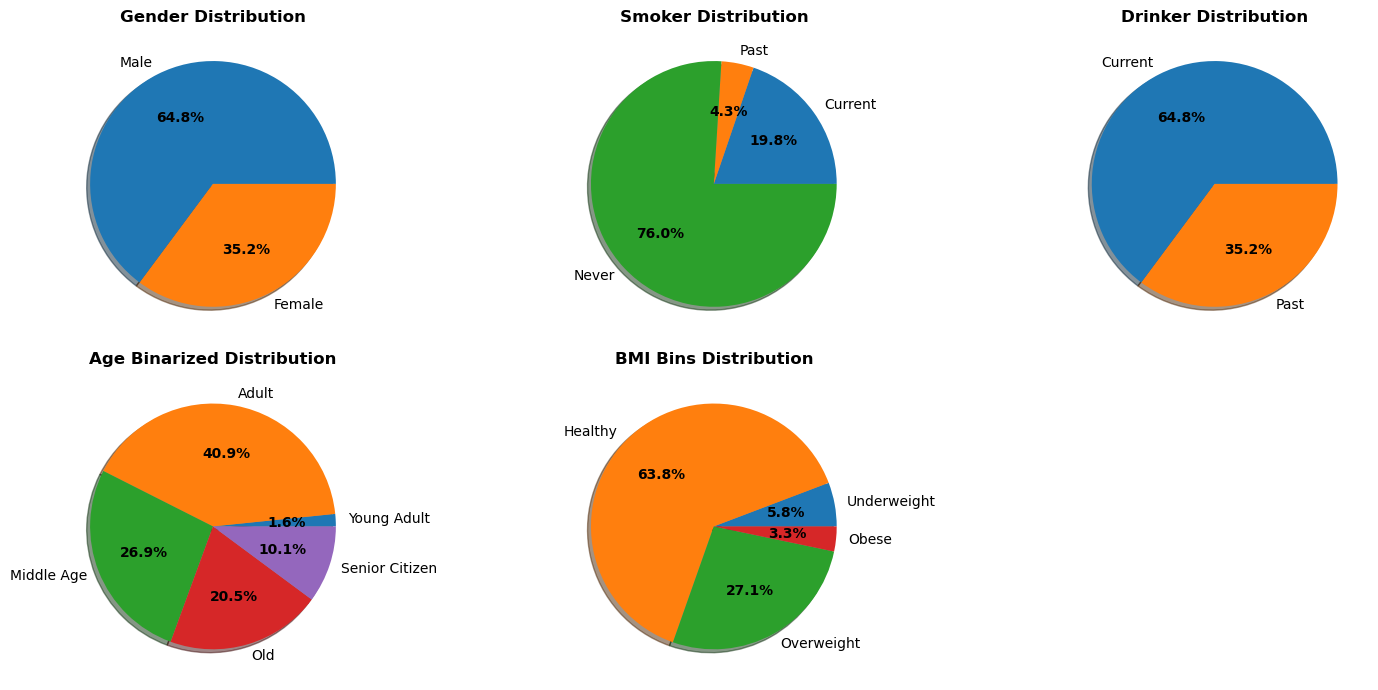

In [43]:
i=1
col_lis = ['Gender','Smoker','Drinker','Age Binarized','BMI Bins']
nrows, ncols = 2, 3
fig = plt.figure(figsize = (15,7))
for col in col_lis:
    ser = data_proc.groupby(col)[col].count()
    ax = fig.add_subplot(nrows, ncols, i)
    wedges, texts, autotexts = ax.pie(ser.values, labels = ser.index, autopct = '%.1f%%', shadow=True)
    for autotext in autotexts:
        autotext.set_fontweight('bold')
    ax.set_title(col+' Distribution', fontweight='bold')
    i+=1
plt.tight_layout()

## Target vs Age and Gender

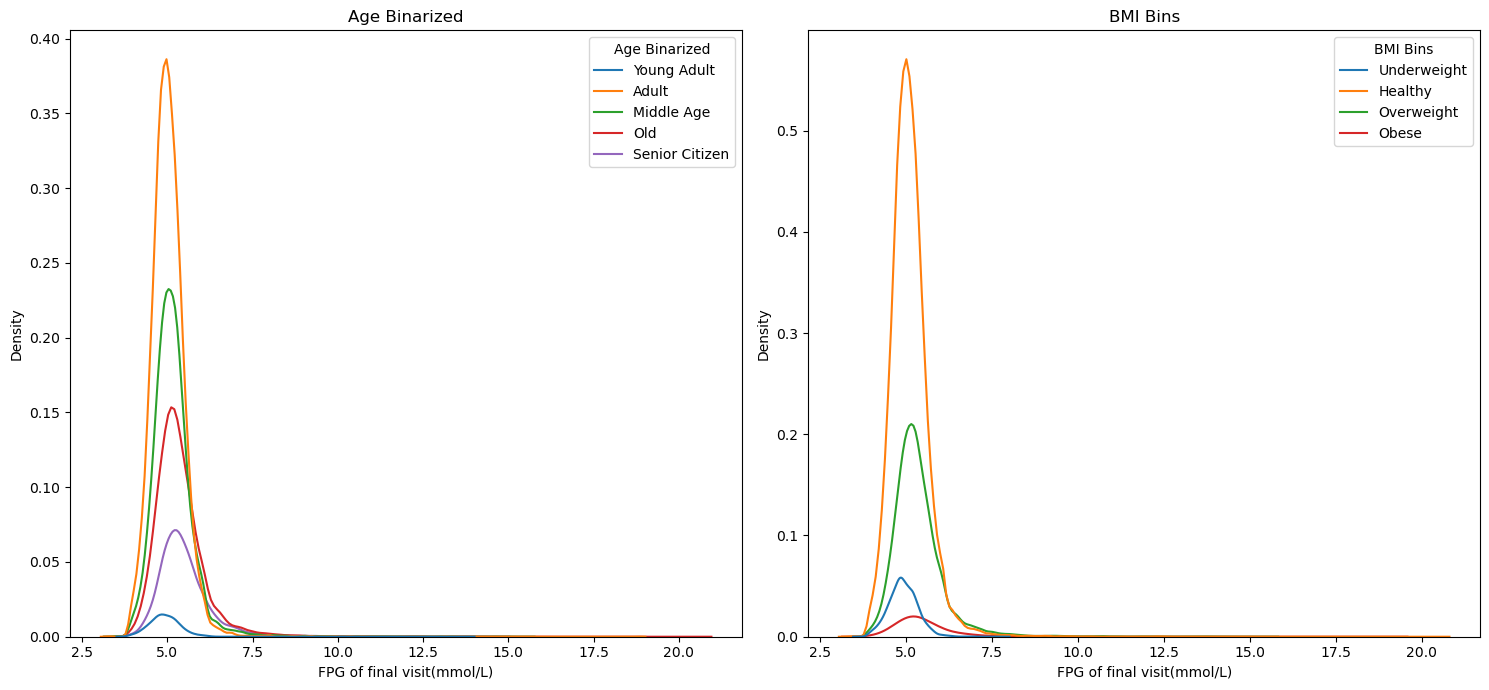

In [44]:
fig = plt.figure(figsize=(15,7))
i=1
nrows = 1
ncols = 2
col_lis = ['Age Binarized','BMI Bins']
for col in col_lis:
    ax = fig.add_subplot(nrows,ncols,i)
    sns.kdeplot(x=data_proc['FPG of final visit(mmol/L)'],hue = data_proc[col],ax=ax)
    ax.set_title(col)
    i+=1
plt.tight_layout()

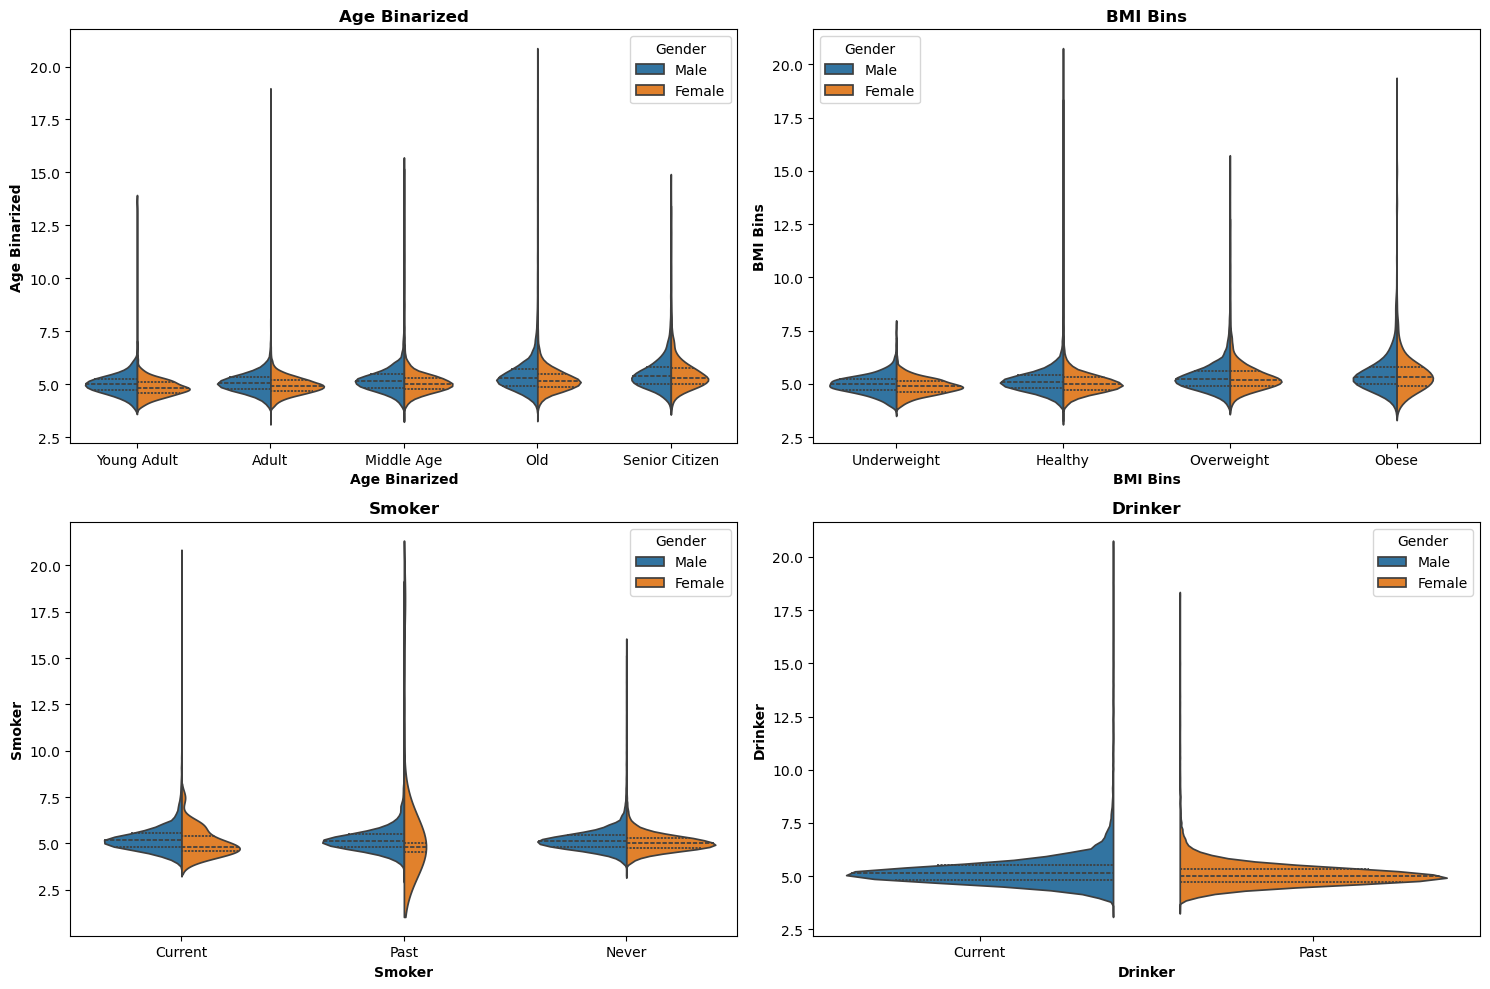

In [45]:
fig = plt.figure(figsize=(15,10))
i=1
nrows = 2
ncols = 2
col_lis = ['Age Binarized','BMI Bins','Smoker','Drinker']
for col in col_lis:
    ax = fig.add_subplot(nrows,ncols,i)
    sns.violinplot(x=data_proc[col],y=data_proc['FPG of final visit(mmol/L)'],hue=data_proc['Gender'],ax=ax, inner='quartile', split=True)
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(),fontweight='bold')
    ax.set_ylabel(ax.get_xlabel(),fontweight='bold')
    i+=1
plt.tight_layout()

## Observing relationships between asting glucose and SBP, DBP, holestrol, HDL, LDL, ALT, AST, Triglycerides etc. among drinkers

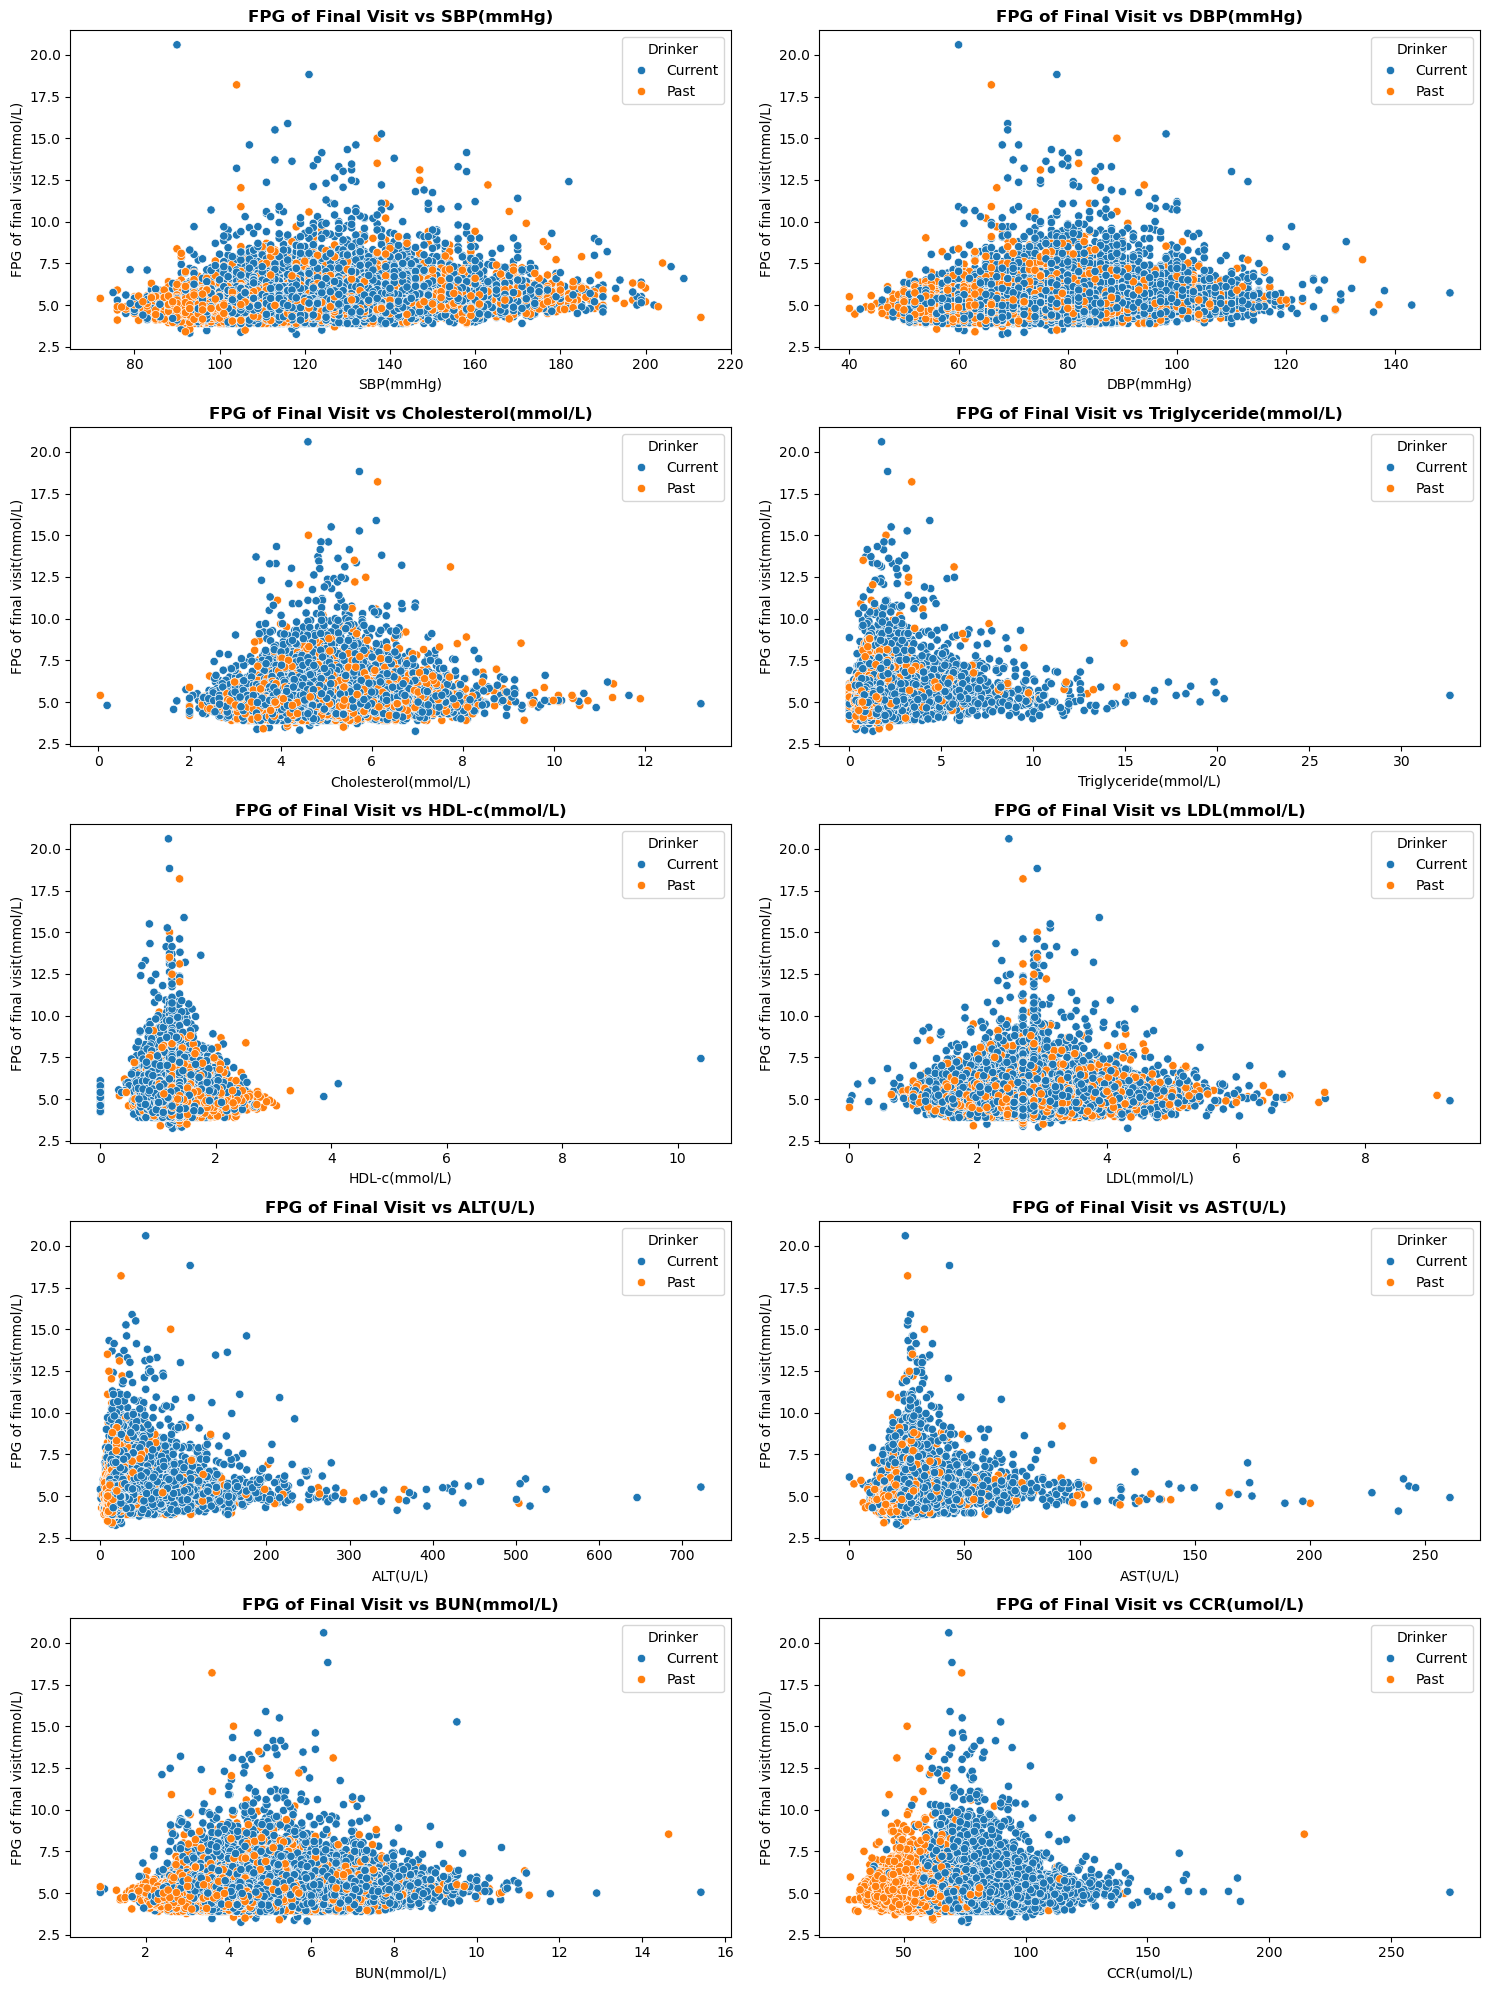

In [46]:
features = ["SBP(mmHg)", "DBP(mmHg)", "Cholesterol(mmol/L)", 
            "Triglyceride(mmol/L)", "HDL-c(mmol/L)", "LDL(mmol/L)", 
            "ALT(U/L)", "AST(U/L)", "BUN(mmol/L)", "CCR(umol/L)"]
nrows = 5
ncols = 2
fig = plt.figure(figsize = (15,20))
i=1

for feature in features:
    ax = fig.add_subplot(nrows,ncols,i)
    sns.scatterplot(data=data_proc, x=feature, y="FPG of final visit(mmol/L)", hue="Drinker", 
                ax=ax)
    ax.set_title(f"FPG of Final Visit vs {feature}",fontweight='bold')
    i+=1
plt.tight_layout()

## Observing relationships between asting glucose and SBP, DBP, holestrol, HDL, LDL, ALT, AST, Triglycerides etc. among smokers

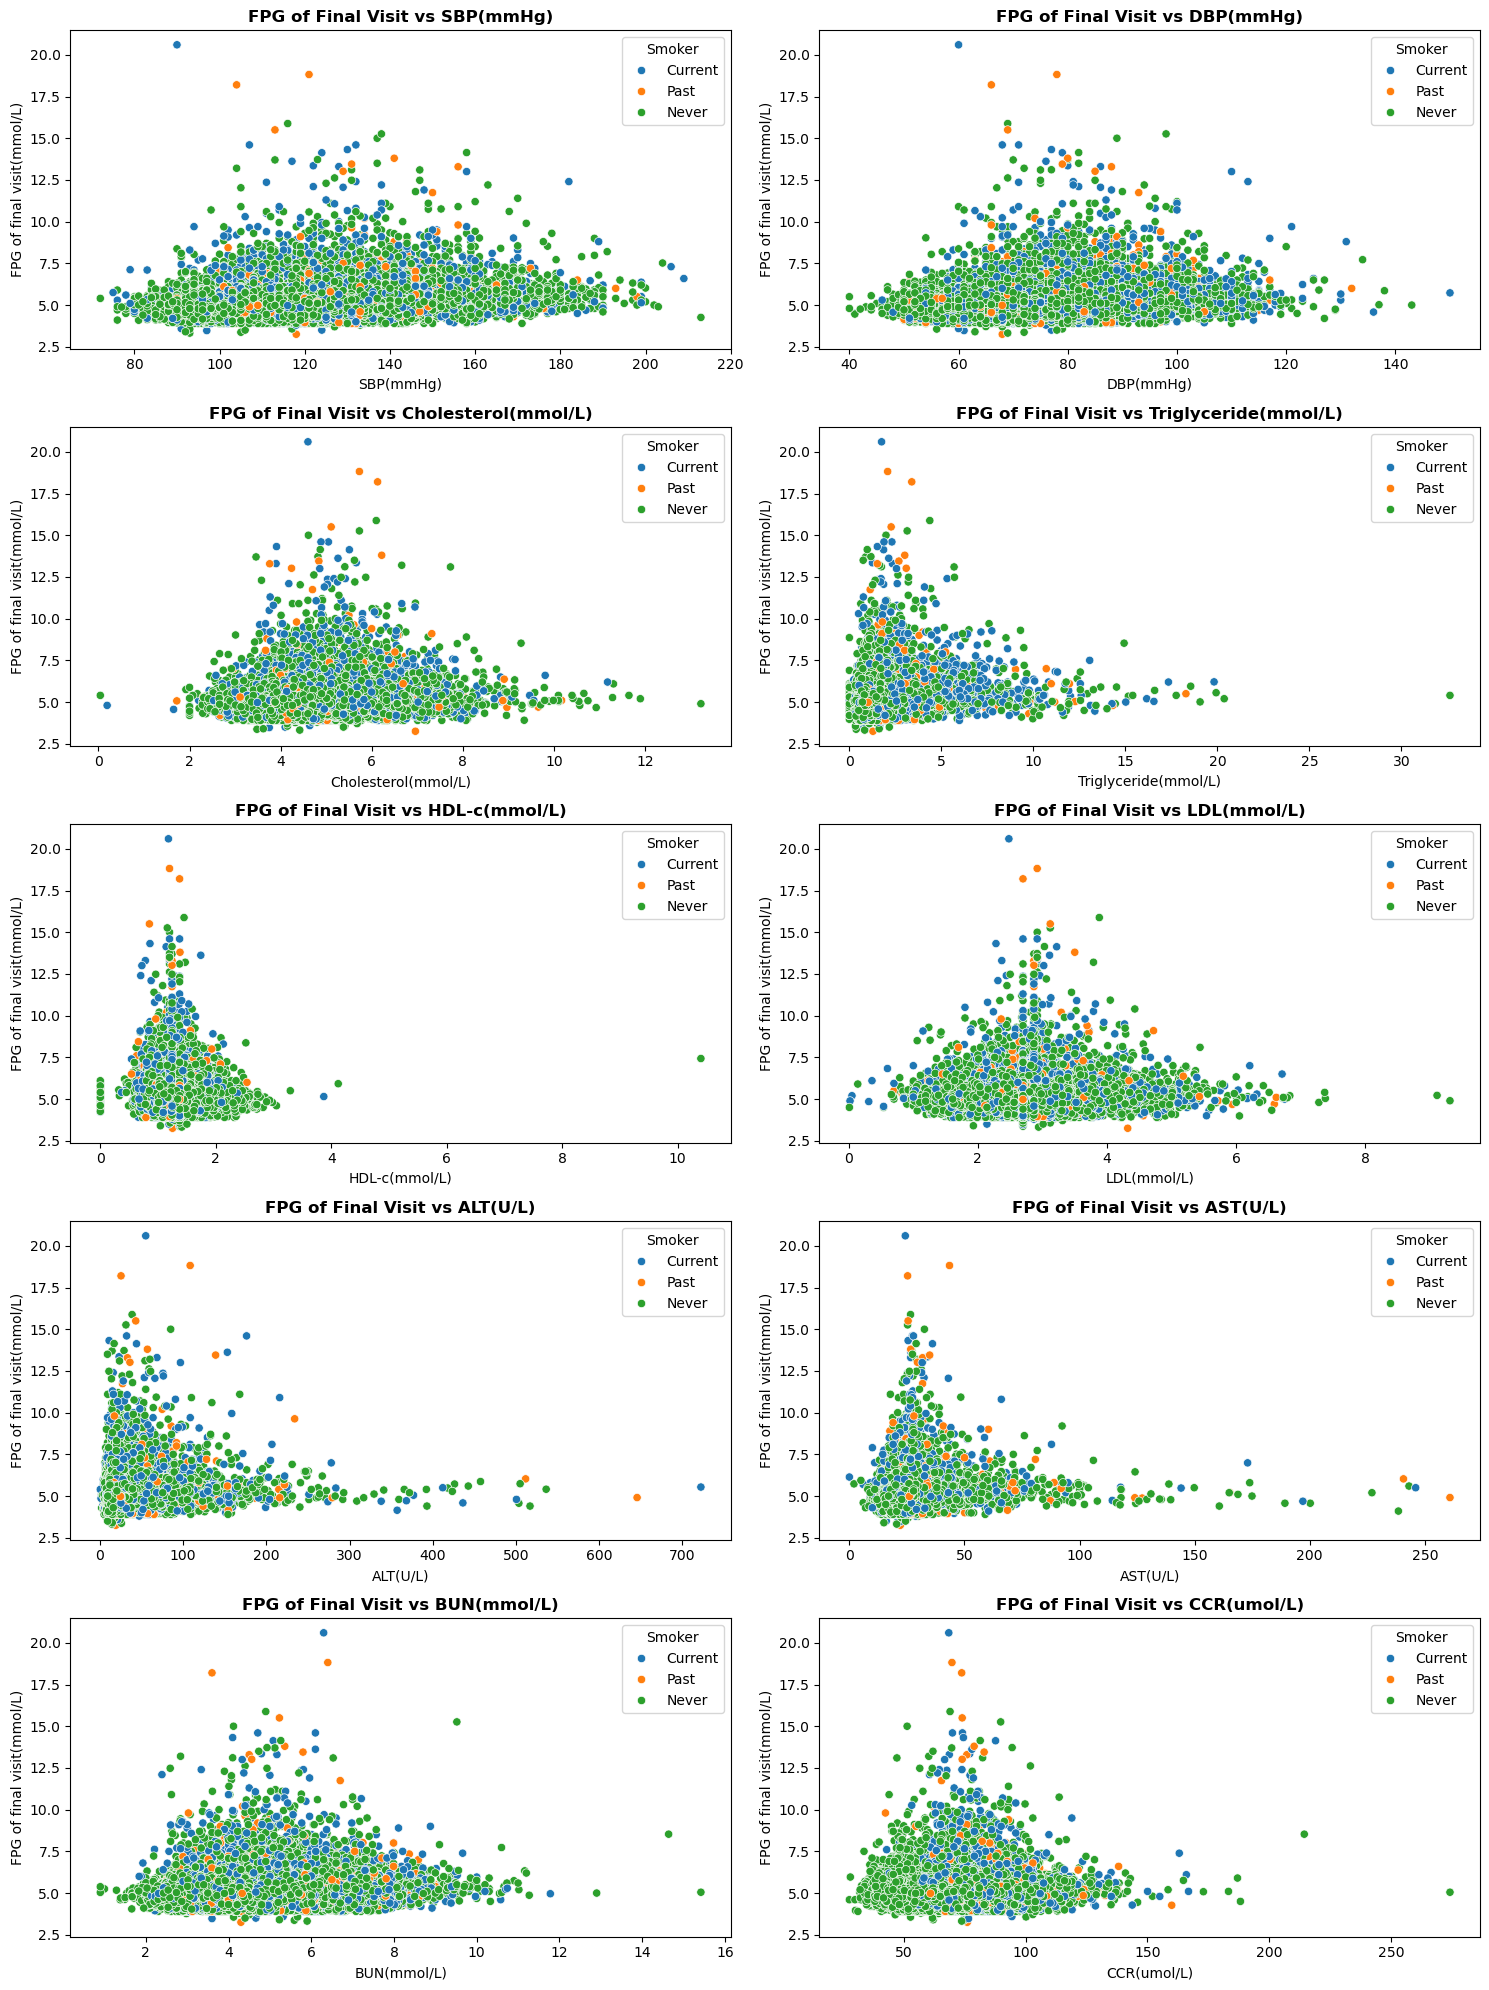

In [47]:
nrows = 5
ncols = 2
fig = plt.figure(figsize = (15,20))
i=1

for feature in features:
    ax = fig.add_subplot(nrows,ncols,i)
    sns.scatterplot(data=data_proc, x=feature, y="FPG of final visit(mmol/L)", hue="Smoker", 
                ax=ax)
    ax.set_title(f"FPG of Final Visit vs {feature}",fontweight='bold')
    i+=1
plt.tight_layout()

## Observing correlation between the features

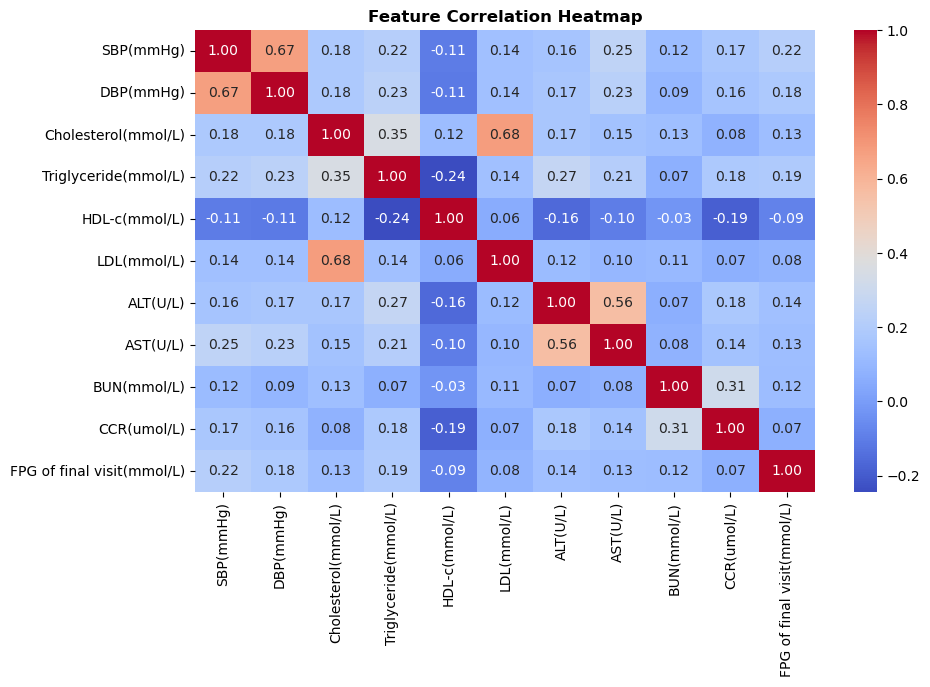

In [48]:
corr_matrix = data_proc[["SBP(mmHg)", "DBP(mmHg)", "Cholesterol(mmol/L)", 
            "Triglyceride(mmol/L)", "HDL-c(mmol/L)", "LDL(mmol/L)", 
            "ALT(U/L)", "AST(U/L)", "BUN(mmol/L)", "CCR(umol/L)","FPG of final visit(mmol/L)"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontweight='bold')
plt.show()

## Performing feature engineering

In [49]:
data_proc['BP_Interaction'] = data_proc['SBP(mmHg)'] * data_proc['DBP(mmHg)']
data_proc['HDL_LDL_Ratio'] = data_proc['HDL-c(mmol/L)'] / data_proc['LDL(mmol/L)']
data_proc['Triglyceride_HDL_Ratio'] = data_proc['Triglyceride(mmol/L)'] / data_proc['HDL-c(mmol/L)']
data_proc['Cholesterol_HDL_Ratio'] = data_proc['Cholesterol(mmol/L)'] / data_proc['HDL-c(mmol/L)']
data_proc['Liver_Interaction'] = data_proc['ALT(U/L)'] * data_proc['AST(U/L)']
data_proc['BUN_CCR_Ratio'] = data_proc['BUN(mmol/L)'] / data_proc['CCR(umol/L)']
data_proc['FPG_Change'] = data_proc['FPG of final visit(mmol/L)'] - data_proc['FPG (mmol/L)']

## Observing correlation between engineered features

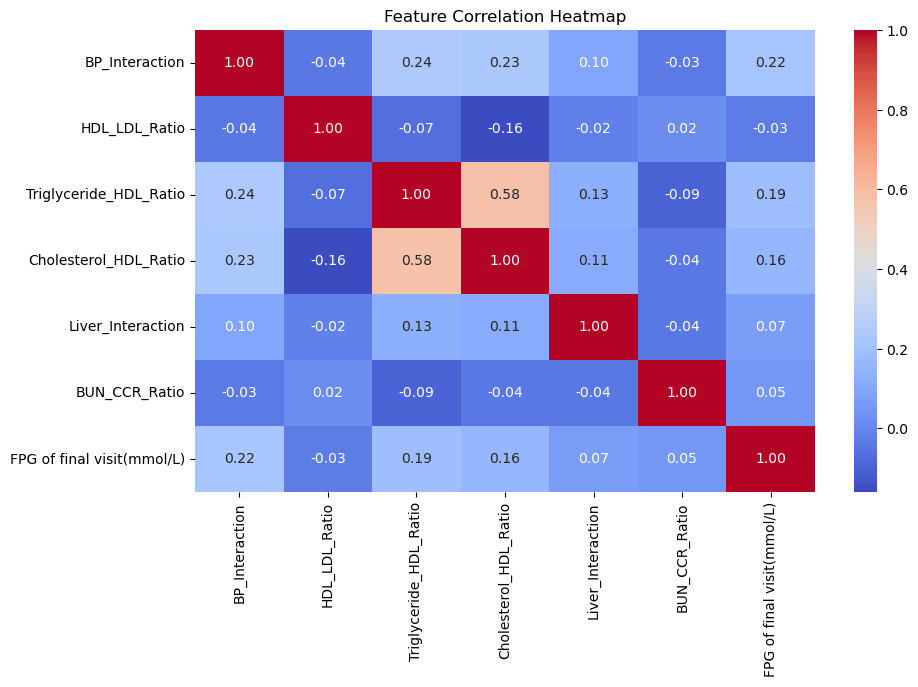

In [50]:
corr_matrix = data_proc[["BP_Interaction", "HDL_LDL_Ratio", "Triglyceride_HDL_Ratio", 
            "Cholesterol_HDL_Ratio", "Liver_Interaction", "BUN_CCR_Ratio", 
            "FPG of final visit(mmol/L)"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()